In [157]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Jupyterの表示オプション
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# エクセルファイルの読み込み
# SIS日刊データ
SIS_df=pd.read_excel("Introduced\SIS分析プロジェクト_日刊60日切り-週間100データ対応_容量削減ver_200831.xlsm",
                     sheet_name="日毎データ累積",
                     header=1,
                     encoding="cp932",
                     na_values=["-","データなし"])
SIS_df_droped=SIS_df.dropna(subset=["機種名","客滞"])
SIS_df_droped['機種名']=SIS_df_droped['機種名'].str.strip()
# SIS_df_droped=SIS_df_droped[(SIS_df_droped["客滞"] != "データなし")]

# 市場スペックデータ
Spec_df=pd.read_excel("Introduced\右打ちチェック用市場データ改β.xlsm",
                      sheet_name="データベース",                      
                      encoding="cp932")
df_renamed=Spec_df.rename(columns={"Oneshot_Rate":"単発率",
                                    "SurfaceCont_Rate":"名目継続率",
                                    "HeavenRush_Rate":"天国突入率",
                                    "HeavenTY_Ave":"天国TY平均",
                                    "FirtstT1Y_Ave":"初回T1Y平均",
                                    "GuessSimMY_Ave":"MY平均"})
# 継続率をビン分割
Cont_bins = [0,0.5,0.6,0.7,0.8,0.9,1]
TS_bins = [0,70,150,220,270,320]
Contbins_names=["継続0%-50%","継続50%-60%","継続60%-70%","継続70%-80%","継続80%-90%","継続90%-100%"]
TSbins_names=["甘未満","甘デジ","ライトミドル","ミドル","ハイミドル"]
# dfにビンの列を追加
df_renamed["継続率帯"] = pd.cut(df_renamed["名目継続率"], Cont_bins, labels=Contbins_names)
df_renamed["TS帯"] = pd.cut(df_renamed["TS"], TS_bins, labels=TSbins_names)
df_renamed
# 過去機種データベース
Product_df=pd.read_excel("Introduced\過去機種データベースまとめ_200617.xlsx",
                         sheet_name="オール機種 数値化",
                         header=11,
                         encoding="cp932")

C:\Users\k-furuhashi.SANSEI-RD\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
# # 導入日数別の推移検証用
# market_df.to_csv("aaa.csv",
#                  encoding="cp932")
# droped_df = SIS_df.dropna(subset=['客滞'])
# droped_df['機種名']=droped_df['機種名'].str.strip()
# index_date=droped_df.groupby("導入日数").count()[0:50].index.tolist()
# display(index_date)
# df_dnum = droped_df.pivot_table(index="機種名", columns="導入日数", values="TY")
# merge_df=pd.merge(market_df,df_dnum,left_on='Product_name',right_index=True,how='left')
# # 甘デジ帯のみに絞る
# # ama_df=merge_df[(merge_df["SurfaceCont_Rate"]>=0.5)]
# ama_df=merge_df.rename(columns={"SurfaceCont_Rate":"継続率帯",
#                               "DirectRush_Rate":"直突入率",
#                               "HeavenTY_Ave":"天国TY"})
# cut_TS = pd.cut(ama_df["TS"], bins=[0,70,130,220,320,1000])
# cut_cont = pd.cut(ama_df["継続率帯"], bins=[0,0.5,0.6,0.7,0.8,0.9,1])
# cut_heavenTY = pd.cut(ama_df["天国TY"], bins=[0,1500,2000,2500,3000,3500,10000])
# # cut_Single = pd.cut(ama_df["天国TY"], bins=[0,0.25,0.5,0.75,1])
# plt.plot(ama_df[ama_df["Product_name"]=="CR真・花の慶次２ L10-VH"][index_date].T ,color = "maroon",label="大海")
# plt.plot(ama_df[ama_df["Product_name"]=="Pリング　呪いの７日間２ JN"][index_date].T ,color = "violet",label="リング")
# # plt.plot(ama_df.groupby(cut_TS).mean()[index_date].T)
# # groupde.plot(figsize=(8, 5))
# # groupde.plot(figsize=(6, 10),subplots=True)
# plt.legend(loc='upper right')
# plt.show()

NameError: name 'market_df' is not defined

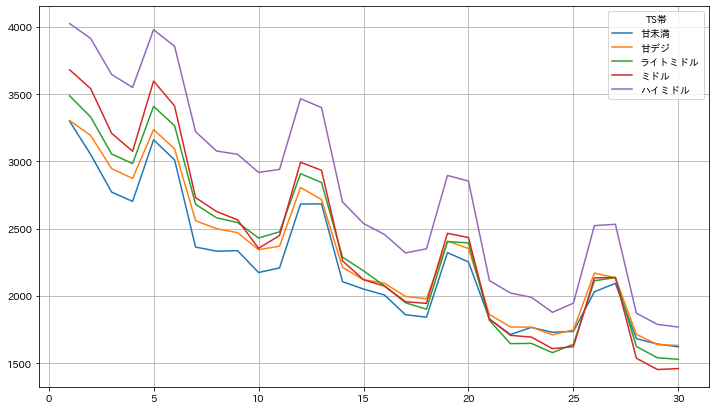

In [158]:
pivot_SIS_df=SIS_df_droped.pivot_table(index="機種名", 
                                       columns="導入日数",
                                       values="アウト",
                                       aggfunc="mean")
                                   
# 対象となる日付をリスト化して保持
date_list=list(pivot_SIS_df.columns)
# データフレームの結合
merge_df=pd.merge(left=pivot_SIS_df,
                  right=df_renamed,
                  left_index=True,
                  right_on="Product_name",
                  how="left")
grouped=merge_df.groupby("TS帯").mean()[date_list].T.iloc[0:30]
grouped.plot(figsize=(12,7),grid=True)

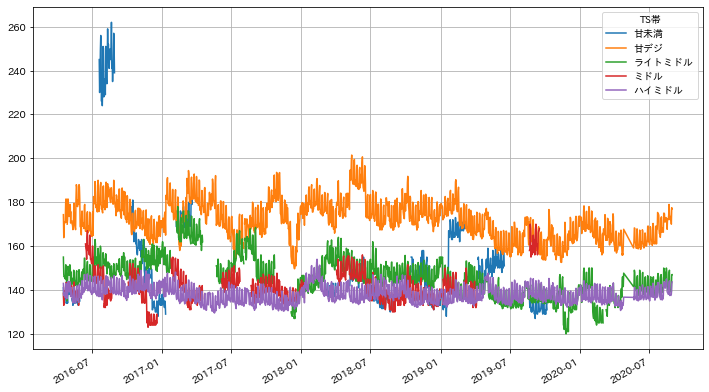

In [159]:
#　客滞の集計表示
SIS_df_droped=SIS_df_droped.set_index("日付")["2016-01-01":].reset_index()
pivot_SIS_df=SIS_df_droped.pivot_table(index="機種名", 
                                       columns="日付",
                                       values="客滞",
                                       aggfunc="mean")
# 対象となる日付をリスト化して保持
date_list=list(pivot_SIS_df.columns)
# データフレームの結合
merge_df=pd.merge(left=pivot_SIS_df,
                  right=df_renamed,
                  left_index=True,
                  right_on="Product_name",
                  how="left")
grouped=merge_df.groupby("TS帯").mean()[date_list].T
grouped.plot(figsize=(12,7),grid=True)

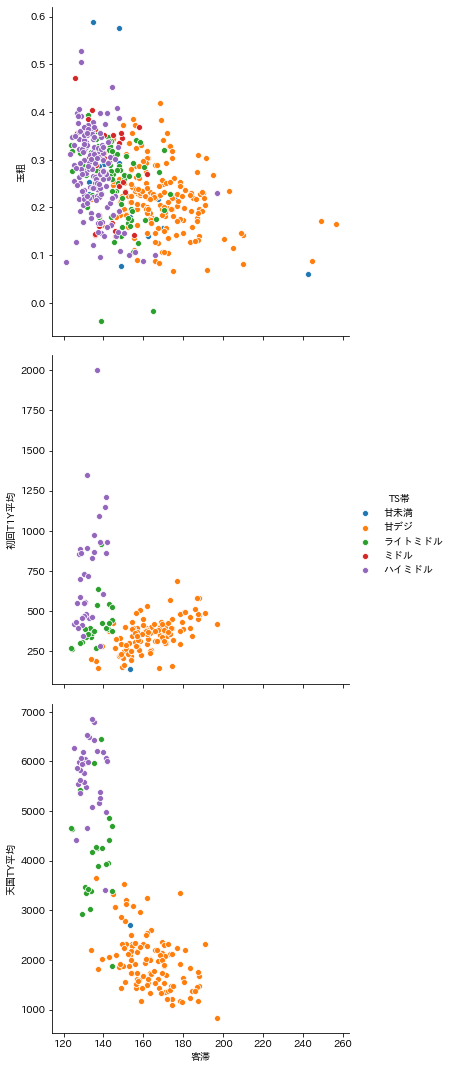

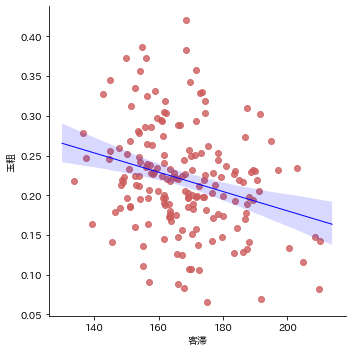

In [191]:
# 必要項目毎の機種別平均データに変換
pivot_SIS_df=SIS_df_droped.pivot_table(index="機種名", 
                                       values=["客滞","玉粗","千円S","アウト","BA","B"],
                                       aggfunc="mean")
# データフレームの結合
merge_df=pd.merge(left=pivot_SIS_df,
                  right=df_renamed,
                  left_index=True,
                  right_on="Product_name",
                  how="left") 
sns.pairplot(data=merge_df,
             hue="TS帯",
             x_vars=["客滞"],
             y_vars=["玉粗","初回T1Y平均","天国TY平均"],
             height=5)
ama_df=merge_df[(merge_df["TS帯"]=="甘デジ") & (merge_df["客滞"] <=240)]
ama_df=ama_df[ama_df["Product_name"]!="CRA　ＳＵＰＥＲ電役ドラゴン伝説77VN"]
sns.lmplot("客滞","玉粗",ama_df, order=1,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"})